In [2]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from scipy import stats as stats

%matplotlib inline

df = pd.read_csv('../data/kc_house_data.csv') 

In [3]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
df['price'].describe()

count      30155.00000
mean     1108535.83787
std       896385.65919
min        27360.00000
25%       648000.00000
50%       860000.00000
75%      1300000.00000
max     30750000.00000
Name: price, dtype: float64

In [5]:
df['grade'].value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64

In [6]:
df['bedrooms'].value_counts()

3     12754
4      9597
2      3936
5      2798
6       498
1       391
7        80
0        44
8        38
9        14
10        3
11        1
13        1
Name: bedrooms, dtype: int64

In [7]:
zerobeds = df[(df['bedrooms'] == 0)]
zerobeds.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
573,3920030050,5/19/2022,930000.00000,0,0.00000,1617,2156,3.00000,NO,NO,...,PUBLIC,2156,0,0,0,2009,0,"6019 Roosevelt Way Northeast, Seattle, Washing...",47.67270,-122.31781
1289,2768301406,3/2/2022,1090000.00000,0,0.00000,1500,1262,3.00000,NO,NO,...,PUBLIC,1500,0,0,0,2021,0,"A, Leadwood, Missouri 63653, United States",37.85979,-90.58113
1310,3462800015,11/10/2021,360000.00000,0,0.00000,910,19000,1.00000,NO,NO,...,PRIVATE,910,0,0,250,1946,0,"26125 79th Avenue South, Kent, Washington 9803...",47.36677,-122.23543
1952,2020069042,9/27/2021,399990.00000,0,0.00000,1677,43264,1.00000,NO,NO,...,PUBLIC,1677,0,0,0,1969,0,"43407 212th Avenue Southeast, Enumclaw, Washin...",47.21166,-122.05920
2044,6896300047,9/17/2021,509000.00000,0,1.00000,400,2385,1.00000,NO,NO,...,PUBLIC,400,0,0,0,1946,0,"8416 B Island Dr S, Seattle, Washington 98118,...",47.52803,-122.26129


In [8]:
#John's code

df['city'] = df['address'].str.split(',').str[1].str.strip()
df['zipcode'] = df['address'].str.split(',').str[-2].str[-5:]
df['zipcode'].head()
df_irs = pd.read_csv('../data/income_by_zip.csv')
df_wa = df_irs.loc[df_irs['STATE'] == 'WA',['STATE','ZIPCODE','N02650','A02650']]
df_wa['avg_inc'] = df_wa['A02650']/df_wa['N02650']
df['zipcode'] = df['zipcode'].astype(int)
df2 = df.merge(df_wa,left_on='zipcode',right_on='ZIPCODE',how='inner')
df2['month'] = pd.DatetimeIndex(df2['date']).month
df2['year'] = pd.DatetimeIndex(df2['date']).year
grade_list = list(df2['grade'].unique())
grade_list_1 = [grade_list[i] for i in [1,3,7,10,11]]
grade_list_2 = ['0 Bad']*5
grade_dict = dict(zip(grade_list_1,grade_list_2))
df2['grade_group'] = df2['grade'].replace(grade_dict)


In [9]:
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,city,zipcode,STATE,ZIPCODE,N02650,A02650,avg_inc,month,year,grade_group
0,7399300360,5/24/2022,675000.00000,4,1.00000,1180,7140,1.00000,NO,NO,...,Renton,98055,WA,98055,12360.00000,901850.00000,72.96521,5,2022,7 Average
1,3340401570,3/2/2022,750000.00000,3,2.00000,1830,7969,1.00000,NO,NO,...,Renton,98055,WA,98055,12360.00000,901850.00000,72.96521,3,2022,7 Average
2,7399301200,3/29/2022,728000.00000,4,2.00000,2170,7520,1.00000,NO,NO,...,Renton,98055,WA,98055,12360.00000,901850.00000,72.96521,3,2022,7 Average
3,9899200050,3/24/2022,565000.00000,4,2.00000,1400,10364,1.50000,NO,NO,...,Renton,98055,WA,98055,12360.00000,901850.00000,72.96521,3,2022,0 Bad
4,6673070070,12/28/2021,645000.00000,3,2.00000,1520,8250,1.00000,NO,NO,...,Renton,98055,WA,98055,12360.00000,901850.00000,72.96521,12,2021,8 Good


In [10]:
pd.set_option('display.max_rows', None)
df2['city'].value_counts()
seattle = df2[(df2['city'] == 'Seattle')]
seattle.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,city,zipcode,STATE,ZIPCODE,N02650,A02650,avg_inc,month,year,grade_group
219,8910500230,12/13/2021,920000.00000,5,2.50000,2770,6703,1.00000,NO,NO,...,Seattle,98133,WA,98133,25930.00000,2194198.00000,84.62005,12,2021,7 Average
221,6450304798,8/20/2021,730000.00000,3,2.00000,1570,1184,3.00000,NO,NO,...,Seattle,98133,WA,98133,25930.00000,2194198.00000,84.62005,8,2021,8 Good
223,2683100015,9/10/2021,835000.00000,4,1.50000,2650,8129,1.50000,NO,NO,...,Seattle,98133,WA,98133,25930.00000,2194198.00000,84.62005,9,2021,7 Average
224,2291400343,9/12/2021,539000.00000,3,2.50000,1290,1160,2.00000,NO,NO,...,Seattle,98133,WA,98133,25930.00000,2194198.00000,84.62005,9,2021,7 Average
225,3034200190,6/25/2021,1395000.00000,4,2.00000,3320,23940,1.00000,NO,NO,...,Seattle,98133,WA,98133,25930.00000,2194198.00000,84.62005,6,2021,8 Good


In [11]:
# >= 2 bedroom home for families making 50% - 80% of king county family average (120k) = 60k - 96k
seattle['bedrooms'].describe()

count   9368.00000
mean       3.18072
std        1.06444
min        0.00000
25%        2.00000
50%        3.00000
75%        4.00000
max       11.00000
Name: bedrooms, dtype: float64

In [12]:
#exploring 11 bedrooms
q = seattle.loc[seattle['bedrooms'] == 11]
pd.set_option('display.max_colwidth', None)
q['address']

25935    5205 11th Avenue Northeast, Seattle, Washington 98105, United States
Name: address, dtype: object

redfin listings:
11 bedrooms
https://www.redfin.com/WA/Seattle/5205-11th-Ave-NE-98105/home/312092

In [13]:
#2-5 bedrooms
seattle_beds = seattle[(seattle['bedrooms'] > 1) & (seattle['bedrooms'] < 6)]
seattle_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8929 entries, 219 to 27814
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             8929 non-null   int64  
 1   date           8929 non-null   object 
 2   price          8929 non-null   float64
 3   bedrooms       8929 non-null   int64  
 4   bathrooms      8929 non-null   float64
 5   sqft_living    8929 non-null   int64  
 6   sqft_lot       8929 non-null   int64  
 7   floors         8929 non-null   float64
 8   waterfront     8929 non-null   object 
 9   greenbelt      8929 non-null   object 
 10  nuisance       8929 non-null   object 
 11  view           8929 non-null   object 
 12  condition      8929 non-null   object 
 13  grade          8929 non-null   object 
 14  heat_source    8929 non-null   object 
 15  sewer_system   8925 non-null   object 
 16  sqft_above     8929 non-null   int64  
 17  sqft_basement  8929 non-null   int64  
 18  sqft_

In [14]:
seattle_beds['bedrooms'].value_counts()

3    3969
2    2152
4    2147
5     661
Name: bedrooms, dtype: int64

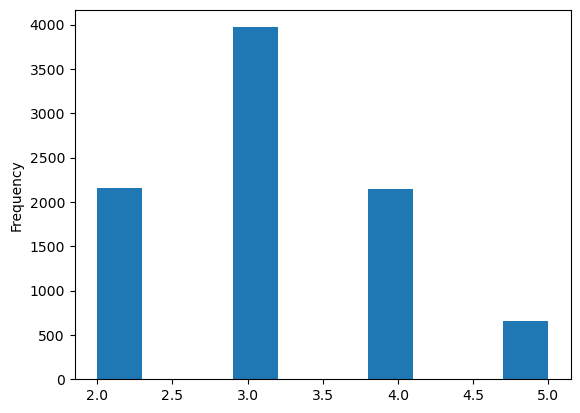

In [15]:
#visualization - the bedrooms
seattle_beds['bedrooms'].plot(kind='hist');

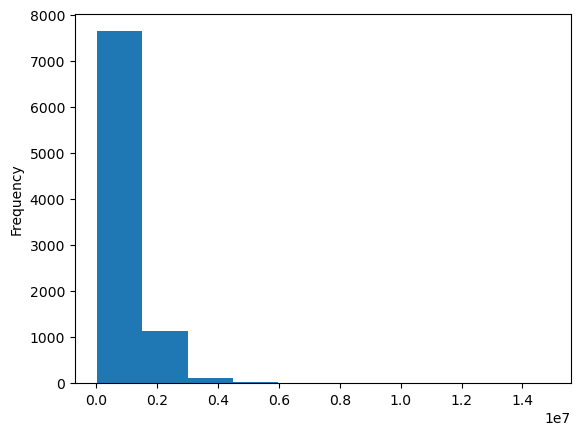

In [16]:
#visualization - the prices
seattle_beds['price'].plot(kind='hist');

In [17]:
seattle_beds['price'].describe()

count       8929.00000
mean     1065280.77814
std       669149.32127
min        27563.00000
25%       700000.00000
50%       895000.00000
75%      1240320.00000
max     14850000.00000
Name: price, dtype: float64

In [18]:
seattle_beds['condition'].value_counts()

Average      5762
Good         2033
Very Good    1021
Fair           87
Poor           26
Name: condition, dtype: int64

In [19]:
seattle_beds['grade_group'].value_counts()

7 Average       3932
8 Good          2664
0 Bad           1356
9 Better         923
11 Excellent      41
12 Luxury         10
4 Low              3
Name: grade_group, dtype: int64

In [20]:
seattle_beds.groupby('grade')['price'].mean().sort_values(ascending=False)

grade
13 Mansion      9571024.66667
12 Luxury       5054500.00000
11 Excellent    3805332.63415
10 Very Good    2466917.36620
9 Better        1582074.02817
8 Good          1100977.09572
7 Average        902937.08240
6 Low Average    685611.02212
4 Low            638333.33333
5 Fair           635384.71154
Name: price, dtype: float64

In [21]:
#what even is a mansion in the city? 
seattle_beds.loc[seattle['grade'] == '13 Mansion']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,city,zipcode,STATE,ZIPCODE,N02650,A02650,avg_inc,month,year,grade_group
16115,1954700021,11/1/2021,12901148.00000,4,5.00000,10900,30417,2.00000,NO,NO,...,Seattle,98112,WA,98112,12170.00000,4085499.00000,335.70247,11,2021,0 Bad
16144,1118000664,12/13/2021,8750000.00000,5,6.00000,8030,12250,2.00000,NO,NO,...,Seattle,98112,WA,98112,12170.00000,4085499.00000,335.70247,12,2021,0 Bad
16267,9185700156,8/26/2021,8800000.00000,5,7.50000,8640,10894,3.00000,NO,NO,...,Seattle,98112,WA,98112,12170.00000,4085499.00000,335.70247,8,2021,0 Bad
19870,5026900300,2/18/2022,13850000.00000,3,4.50000,7170,27107,2.00000,YES,NO,...,Seattle,98122,WA,98122,23310.00000,3018054.00000,129.47465,2,2022,0 Bad
25875,5364200715,4/8/2022,4250000.00000,5,6.50000,6430,45934,1.00000,NO,NO,...,Seattle,98105,WA,98105,16930.00000,3286276.00000,194.10963,4,2022,0 Bad
26074,4217402320,3/24/2022,8875000.00000,4,4.50000,7100,23367,2.00000,YES,NO,...,Seattle,98105,WA,98105,16930.00000,3286276.00000,194.10963,3,2022,0 Bad


In [22]:
seattle_beds['condition'].value_counts()

Average      5762
Good         2033
Very Good    1021
Fair           87
Poor           26
Name: condition, dtype: int64

In [23]:
seattle_beds.groupby('condition')['price'].mean().sort_values(ascending=False)

condition
Very Good   1245500.85309
Good        1126225.08067
Average     1016360.08678
Fair         835500.00000
Poor         833261.07692
Name: price, dtype: float64

# Not sure looking only within the city is feasible - exploring data in the whole area

In [24]:
#data primarily focuses on families up to 4
kc_beds = df2[(df2['bedrooms'] > 1) & (df2['bedrooms'] < 5)]
kc_beds.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,city,zipcode,STATE,ZIPCODE,N02650,A02650,avg_inc,month,year,grade_group
0,7399300360,5/24/2022,675000.00000,4,1.00000,1180,7140,1.00000,NO,NO,...,Renton,98055,WA,98055,12360.00000,901850.00000,72.96521,5,2022,7 Average
1,3340401570,3/2/2022,750000.00000,3,2.00000,1830,7969,1.00000,NO,NO,...,Renton,98055,WA,98055,12360.00000,901850.00000,72.96521,3,2022,7 Average
2,7399301200,3/29/2022,728000.00000,4,2.00000,2170,7520,1.00000,NO,NO,...,Renton,98055,WA,98055,12360.00000,901850.00000,72.96521,3,2022,7 Average
3,9899200050,3/24/2022,565000.00000,4,2.00000,1400,10364,1.50000,NO,NO,...,Renton,98055,WA,98055,12360.00000,901850.00000,72.96521,3,2022,0 Bad
4,6673070070,12/28/2021,645000.00000,3,2.00000,1520,8250,1.00000,NO,NO,...,Renton,98055,WA,98055,12360.00000,901850.00000,72.96521,12,2021,8 Good


In [25]:
kc_beds.groupby('grade_group')['price'].mean().sort_values(ascending=False)

grade_group
12 Luxury      4890726.08696
11 Excellent   3198627.56818
9 Better       1531748.71116
8 Good         1059179.89477
0 Bad          1022707.71399
7 Average       811423.76432
4 Low           507421.05263
3 Poor          444000.00000
Name: price, dtype: float64

In [26]:
kc_beds.groupby('condition')['price'].mean().sort_values(ascending=False)

condition
Very Good   1053190.52986
Average     1048458.72158
Good        1013898.19409
Fair         763330.79381
Poor         670624.75000
Name: price, dtype: float64

In [27]:
kc_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 0 to 29219
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             25392 non-null  int64  
 1   date           25392 non-null  object 
 2   price          25392 non-null  float64
 3   bedrooms       25392 non-null  int64  
 4   bathrooms      25392 non-null  float64
 5   sqft_living    25392 non-null  int64  
 6   sqft_lot       25392 non-null  int64  
 7   floors         25392 non-null  float64
 8   waterfront     25392 non-null  object 
 9   greenbelt      25392 non-null  object 
 10  nuisance       25392 non-null  object 
 11  view           25392 non-null  object 
 12  condition      25392 non-null  object 
 13  grade          25392 non-null  object 
 14  heat_source    25380 non-null  object 
 15  sewer_system   25385 non-null  object 
 16  sqft_above     25392 non-null  int64  
 17  sqft_basement  25392 non-null  int64  
 18  sqft_g

In [28]:
kc_beds.drop('N02650', inplace=True, axis=1)
kc_beds.drop('A02650', inplace=True, axis=1)
kc_beds.drop('STATE', inplace=True, axis=1)
kc_beds.drop('ZIPCODE', inplace=True, axis=1)
kc_beds.drop('date', inplace=True, axis=1)

/var/folders/xc/4fn08svj2dgdk_3wj3xkp_rr0000gn/T/ipykernel_33216/2464960750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kc_beds.drop('N02650', inplace=True, axis=1)
/var/folders/xc/4fn08svj2dgdk_3wj3xkp_rr0000gn/T/ipykernel_33216/2464960750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kc_beds.drop('A02650', inplace=True, axis=1)
/var/folders/xc/4fn08svj2dgdk_3wj3xkp_rr0000gn/T/ipykernel_33216/2464960750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [29]:
kc_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 0 to 29219
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             25392 non-null  int64  
 1   price          25392 non-null  float64
 2   bedrooms       25392 non-null  int64  
 3   bathrooms      25392 non-null  float64
 4   sqft_living    25392 non-null  int64  
 5   sqft_lot       25392 non-null  int64  
 6   floors         25392 non-null  float64
 7   waterfront     25392 non-null  object 
 8   greenbelt      25392 non-null  object 
 9   nuisance       25392 non-null  object 
 10  view           25392 non-null  object 
 11  condition      25392 non-null  object 
 12  grade          25392 non-null  object 
 13  heat_source    25380 non-null  object 
 14  sewer_system   25385 non-null  object 
 15  sqft_above     25392 non-null  int64  
 16  sqft_basement  25392 non-null  int64  
 17  sqft_garage    25392 non-null  int64  
 18  sqft_p

In [30]:
kc_beds['city'].value_counts()

Seattle                    8268
Renton                     1709
Kent                       1404
Auburn                     1376
Bellevue                   1109
Kirkland                   1068
Federal Way                1057
Redmond                     854
Sammamish                   825
Maple Valley                783
Shoreline                   706
Burien                      540
Woodinville                 525
Issaquah                    480
Covington                   448
Enumclaw                    427
North Bend                  399
Des Moines                  370
Kenmore                     287
Snoqualmie                  260
Black Diamond               237
Mercer Island               235
SeaTac                      232
Bothell                     227
Duvall                      224
Lake Forest Park            185
Vashon                      162
Tukwila                     155
Newcastle                   152
Carnation                   142
Fall City                   105
Normandy

# doesn't make sense to buy homes not within commutable distance

defining commutable as less than 30 mins by car
https://docs.google.com/spreadsheets/d/1mfAQ0W1YXHq_TQSfAfHIigUQyJkhhD1BAxehxAE5YPg/edit#gid=0

In [75]:
kc2 = kc_beds[(kc_beds['city'] != 'Bothell')]
kc2 = kc2[(kc2['city'] != 'Algona')]
kc2 = kc2[(kc2['city'] != 'Pacific')]
kc2 = kc2[(kc2['city'] != 'Cottage Lake')]
kc2 = kc2[(kc2['city'] != 'Maple Valley')]
kc2 = kc2[(kc2['city'] != 'Milton')]
kc2 = kc2[(kc2['city'] != 'Union Hill-Novelty Hill')]
kc2 = kc2[(kc2['city'] != 'Hobart')]
kc2 = kc2[(kc2['city'] != 'Carnation')]
kc2 = kc2[(kc2['city'] != 'Ames Lake')]
kc2 = kc2[(kc2['city'] != 'Covington')]
kc2 = kc2[(kc2['city'] != 'Duvall')]
kc2 = kc2[(kc2['city'] != 'Puyallup')]
kc2 = kc2[(kc2['city'] != 'Dash Point')]
kc2 = kc2[(kc2['city'] != 'Ravensdale')]
kc2 = kc2[(kc2['city'] != 'Snohomish')]
kc2 = kc2[(kc2['city'] != 'Monroe')]
kc2 = kc2[(kc2['city'] != 'Black Diamond')]
kc2 = kc2[(kc2['city'] != 'Marysville')]
kc2 = kc2[(kc2['city'] != 'Snoqualmie Pass')]
kc2 = kc2[(kc2['city'] != 'Enumclaw')]
kc2 = kc2[(kc2['city'] != 'Spanaway')]
kc2 = kc2[(kc2['city'] != 'Tulalip')]
kc2 = kc2[(kc2['city'] != 'Arlington')]
kc2 = kc2[(kc2['city'] != 'Vashon')]
kc2 = kc2[(kc2['city'] != 'Baring')]
kc2 = kc2[(kc2['city'] != 'Eatonville')]
kc2 = kc2[(kc2['city'] != 'Vancouver')]
kc2 = kc2[(kc2['city'] != 'Spokane')]
kc2 = kc2[(kc2['city'] != 'Clarkston')]
kc2 = kc2[(kc2['city'] != 'Dilworth')]
kc2['city'].value_counts()

Seattle                    8268
Renton                     1709
Kent                       1404
Auburn                     1376
Bellevue                   1109
Kirkland                   1068
Federal Way                1057
Redmond                     854
Sammamish                   825
Shoreline                   706
Burien                      540
Woodinville                 525
Issaquah                    480
North Bend                  399
Des Moines                  370
Kenmore                     287
Snoqualmie                  260
Mercer Island               235
SeaTac                      232
Lake Forest Park            185
Tukwila                     155
Newcastle                   152
Fall City                   105
Normandy Park                90
Medina                       39
Clyde Hill                   37
Beaux Arts                   11
Yarrow Point                  7
Hunts Point                   7
35th Ave SW & SW Holden       3
Preston                       3
Lakeland

In [76]:
kc2.loc[kc2['city'] == '35th Ave SW & SW Holden']

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,yr_renovated,address,lat,long,city,zipcode,avg_inc,month,year,grade_group
8536,139000091,1180000.00000,2,2.50000,1260,700,2.00000,NO,NO,YES,...,0,"35th Ave SW & SW Holden Bus Stop, 35th Ave SW & SW Holden, Seattle, Seattle, Washington 98126, United States",47.53409,-122.37652,35th Ave SW & SW Holden,98126,114.75369,4,2022,9 Better
8716,139000123,1200000.00000,3,2.50000,1310,1251,2.00000,NO,NO,YES,...,0,"35th Ave SW & SW Holden Bus Stop, 35th Ave SW & SW Holden, Seattle, Seattle, Washington 98126, United States",47.53409,-122.37652,35th Ave SW & SW Holden,98126,114.75369,10,2021,9 Better
8846,139000125,1030000.00000,3,2.50000,1360,2227,2.00000,NO,NO,YES,...,0,"35th Ave SW & SW Holden Bus Stop, 35th Ave SW & SW Holden, Seattle, Seattle, Washington 98126, United States",47.53409,-122.37652,35th Ave SW & SW Holden,98126,114.75369,1,2022,9 Better


In [77]:
#data cleaning sanity check
kc2 = kc2.replace('35th Ave SW & SW Holden', 'Seattle', regex=True)
kc2.loc[kc2['city'] == '35th Ave SW & SW Holden']

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,yr_renovated,address,lat,long,city,zipcode,avg_inc,month,year,grade_group


In [78]:
#data cleaning sanity check
kc2.loc[kc2['city'] == '2301 NE Northlake Way']

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,yr_renovated,address,lat,long,city,zipcode,avg_inc,month,year,grade_group
5945,4083306403,1205000.00000,3,2.00000,1400,1445,2.00000,NO,NO,YES,...,0,"Sunnyside Avenue North Boat Ramp, 2301 NE Northlake Way, Seattle, Washington 98103, United States",47.65025,-122.33084,2301 NE Northlake Way,98103,147.63544,2,2022,8 Good


In [79]:
kc2 = kc2.replace('2301 NE Northlake Way', 'Seattle', regex=True)
kc2.loc[kc2['city'] == '2301 NE Northlake Way']

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,yr_renovated,address,lat,long,city,zipcode,avg_inc,month,year,grade_group


In [80]:
kc2['price'].describe()

count      22502.00000
mean     1068011.70803
std       771519.16754
min        27360.00000
25%       640000.00000
50%       860000.00000
75%      1280468.75000
max     23500000.00000
Name: price, dtype: float64

In [81]:
kc2['condition'].value_counts()

Average      13280
Good          6427
Very Good     2579
Fair           178
Poor            38
Name: condition, dtype: int64

In [82]:
kc2['sqft_lot'].describe()

count     22502.00000
mean      13657.62306
std       46783.19353
min         402.00000
25%        4860.75000
50%        7400.00000
75%       10246.50000
max     3067495.00000
Name: sqft_lot, dtype: float64

In [83]:
kc2.loc[kc2['sqft_lot'] == 402]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,yr_renovated,address,lat,long,city,zipcode,avg_inc,month,year,grade_group
21008,7518508947,565000.00000,2,2.00000,680,402,2.00000,NO,NO,NO,...,0,"6522D 24th Ave NW, Seattle, Washington 98117, United States",47.67638,-122.38740,Seattle,98117,161.45633,7,2021,8 Good


In [84]:
kc2['grade_group'].value_counts()

7 Average       9337
8 Good          6800
0 Bad           3467
9 Better        2555
11 Excellent     258
12 Luxury         67
4 Low             15
3 Poor             3
Name: grade_group, dtype: int64

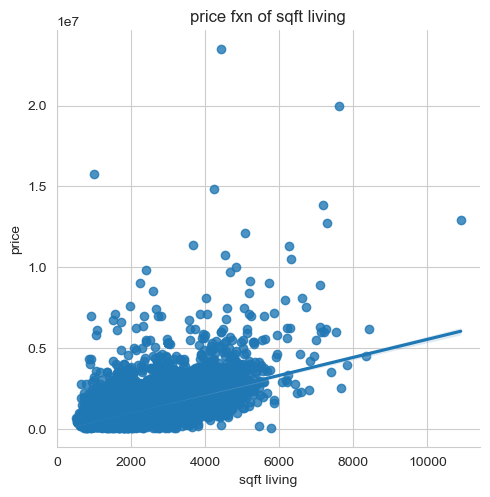

In [85]:
sns.lmplot(data=kc2, x='sqft_living', y='price')
plt.xlabel('sqft living')
plt.ylabel('price')
plt.title('price fxn of sqft living');

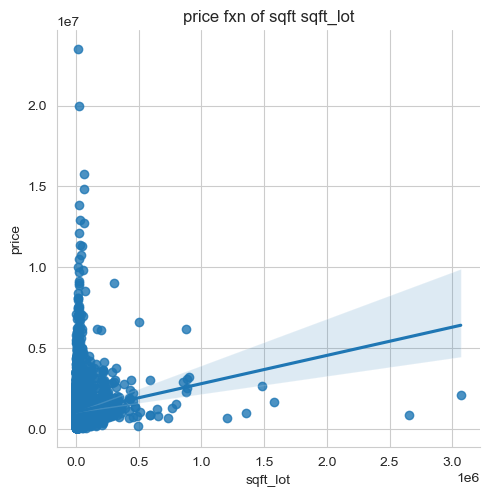

In [86]:
sns.lmplot(data=kc2, x='sqft_lot', y='price')
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.title('price fxn of sqft sqft_lot');

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

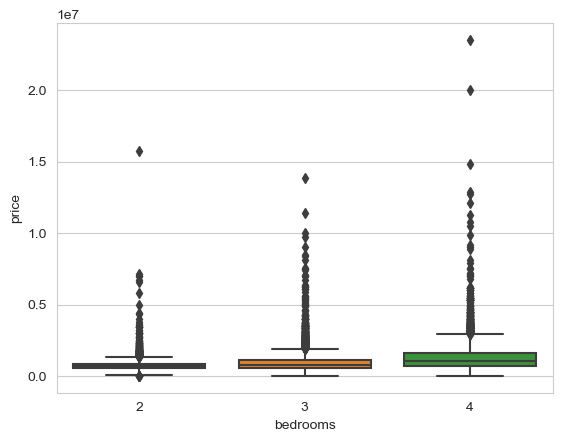

In [88]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'bedrooms', y = 'price', data = kc2)

In [89]:
kc2['bedrooms'].describe()

count   22502.00000
mean        3.22402
std         0.68369
min         2.00000
25%         3.00000
50%         3.00000
75%         4.00000
max         4.00000
Name: bedrooms, dtype: float64

In [90]:
kc2['price'].describe()

count      22502.00000
mean     1068011.70803
std       771519.16754
min        27360.00000
25%       640000.00000
50%       860000.00000
75%      1280468.75000
max     23500000.00000
Name: price, dtype: float64

In [91]:
kc2 = kc2[(kc2['price'] <= 2241171)]
kc2['price'].describe()

count     21240.00000
mean     939011.81836
std      428221.19376
min       27360.00000
25%      629950.00000
50%      830000.00000
75%     1200000.00000
max     2240000.00000
Name: price, dtype: float64

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

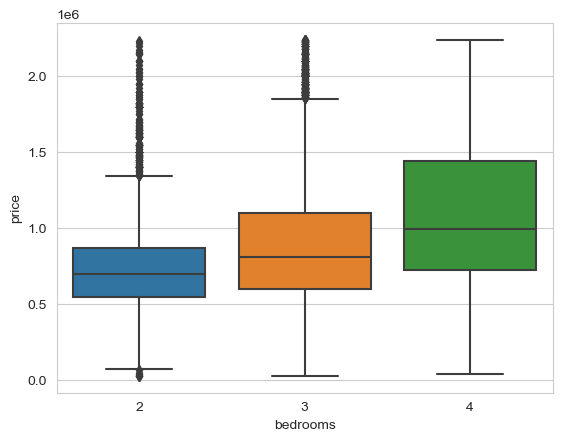

In [51]:
sns.boxplot(x = 'bedrooms', y = 'price', data = kc2)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

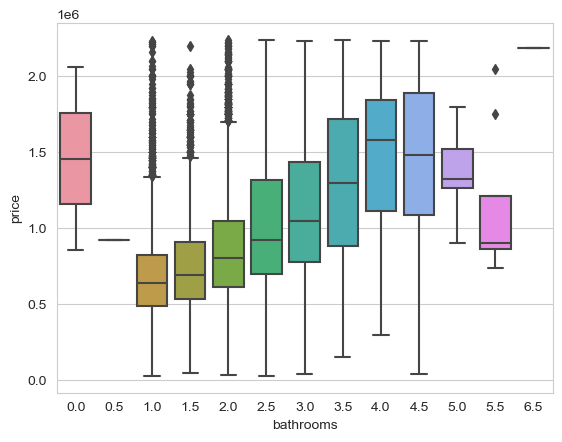

In [92]:
sns.boxplot(x = 'bathrooms', y = 'price', data = kc2)

In [109]:
zerobaths = kc2.loc[(kc2['bathrooms'] == 0)]

In [110]:
zerohalfbaths['address']

24031    19405 140th Avenue Southeast, Renton, Washington 98058, United States
Name: address, dtype: object

https://www.redfin.com/WA/Snoqualmie/7925-Pine-Ave-SE-98065/home/483116
https://www.zillow.com/homedetails/22413-SE-32nd-St-Sammamish-WA-98075/80260261_zpid/

not actually zero baths but out of ideal price range anyway so going to drop for now and see whats up with that

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

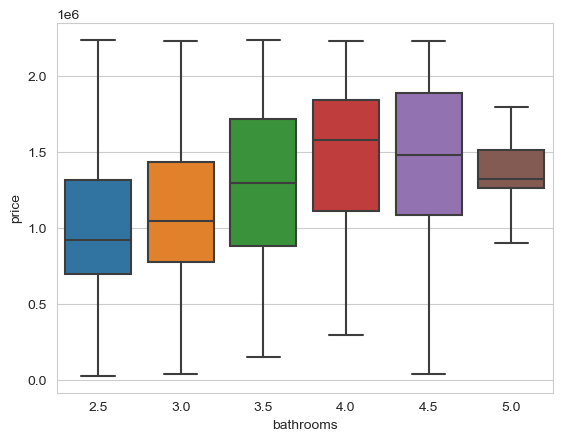

In [112]:
kc2 = kc2[(kc2['bathrooms'] > 2) & (kc2['bathrooms'] <5.5)]
sns.boxplot(x = 'bathrooms', y = 'price', data = kc2)

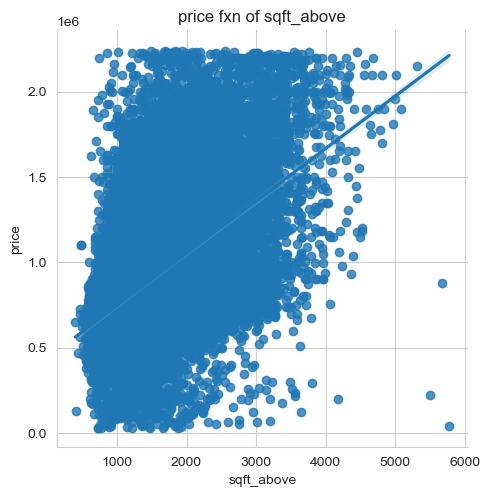

In [96]:
sns.lmplot(data=kc2, x='sqft_above', y='price')
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.title('price fxn of sqft_above');

In [114]:
kc2.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,zipcode,avg_inc,month,year,avg_price
id,1.00000,0.00104,-0.00992,-0.03747,-0.02790,-0.13390,0.02577,-0.01157,-0.02023,-0.00021,-0.03223,0.00669,-0.03383,-0.00593,0.03225,-0.03011,0.02484,0.00488,-0.01286,NaN
price,0.00104,1.00000,0.17979,0.23580,0.49960,0.12342,0.05282,0.41109,0.07705,0.12387,0.19929,-0.10026,0.08528,0.49155,0.23718,-0.01669,0.62348,-0.06389,0.09326,NaN
bedrooms,-0.00992,0.17979,1.00000,0.19473,0.44842,0.02607,-0.08843,0.37070,0.03499,0.19997,0.04336,-0.05629,-0.00228,-0.10291,0.12487,-0.12244,0.01825,0.03983,-0.05128,NaN
bathrooms,-0.03747,0.23580,0.19473,1.00000,0.39829,0.07479,-0.02328,0.17667,0.32093,0.00204,0.13934,-0.03107,0.10334,0.08894,-0.05670,0.11216,0.05637,0.04082,-0.04391,NaN
sqft_living,-0.02790,0.49960,0.44842,0.39829,1.00000,0.24125,0.03092,0.80549,0.14620,0.37256,0.28014,0.02625,0.02881,-0.03902,0.27432,-0.12842,0.16750,0.05036,-0.06883,NaN
sqft_lot,-0.13390,0.12342,0.02607,0.07479,0.24125,1.00000,-0.09380,0.20637,0.03245,0.16467,0.23788,-0.03709,0.00264,-0.06145,0.24286,-0.09025,0.04475,0.00938,-0.01210,NaN
floors,0.02577,0.05282,-0.08843,-0.02328,0.03092,-0.09380,1.00000,0.35604,-0.55577,-0.06578,-0.07104,0.47695,-0.04970,0.03843,-0.00231,0.10186,0.02202,-0.02004,0.00181,NaN
sqft_above,-0.01157,0.41109,0.37070,0.17667,0.80549,0.20637,0.35604,1.00000,-0.40275,0.45613,0.14831,0.25606,-0.02898,-0.10986,0.39584,-0.21971,0.15430,0.03678,-0.05870,NaN
sqft_basement,-0.02023,0.07705,0.03499,0.32093,0.14620,0.03245,-0.55577,-0.40275,1.00000,-0.07924,0.18117,-0.38603,0.08388,0.14186,-0.25328,0.18936,-0.00592,0.02022,-0.01074,NaN
sqft_garage,-0.00021,0.12387,0.19997,0.00204,0.37256,0.16467,-0.06578,0.45613,-0.07924,1.00000,0.10158,0.24652,-0.15775,-0.18289,0.36021,-0.33045,0.05391,0.03362,-0.03442,NaN


# Dummy

In [97]:
kc2['avg_price'] = kc2['price'].mean()
X = kc2['avg_price']
y = kc2['price']
dummy_model = sm.OLS(y, sm.add_constant(X))

In [98]:
kc2_preds = kc2.drop('price', axis=1)
kc2_target = kc2['price']
kc2_preds.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,address,lat,long,city,zipcode,avg_inc,month,year,grade_group,avg_price
0,7399300360,4,1.00000,1180,7140,1.00000,NO,NO,NO,NONE,...,"2102 Southeast 21st Court, Renton, Washington 98055, United States",47.46198,-122.19052,Renton,98055,72.96521,5,2022,7 Average,938904.31897
1,3340401570,3,2.00000,1830,7969,1.00000,NO,NO,NO,NONE,...,"306 South 15th Street, Renton, Washington 98055, United States",47.46673,-122.21400,Renton,98055,72.96521,3,2022,7 Average,938904.31897
2,7399301200,4,2.00000,2170,7520,1.00000,NO,NO,NO,NONE,...,"1814 Aberdeen Avenue Southeast, Renton, Washington 98055, United States",47.46393,-122.18974,Renton,98055,72.96521,3,2022,7 Average,938904.31897
3,9899200050,4,2.00000,1400,10364,1.50000,NO,NO,NO,NONE,...,"3426 Shattuck Avenue South, Renton, Washington 98055, United States",47.44845,-122.21243,Renton,98055,72.96521,3,2022,0 Bad,938904.31897
4,6673070070,3,2.00000,1520,8250,1.00000,NO,NO,NO,NONE,...,"2209 Southeast 21st Street, Renton, Washington 98055, United States",47.46087,-122.18869,Renton,98055,72.96521,12,2021,8 Good,938904.31897


In [104]:
y = kc2['price']
x = kc2['bathrooms']
model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     4521.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        07:11:34   Log-Likelihood:            -3.0347e+05
No. Observations:               21237   AIC:                         6.069e+05
Df Residuals:                   21235   BIC:                         6.070e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.167e+05   8211.135     50.753      0.000    4.01e+05    4.33e+05
bathrooms   2.424e+05   3604.424     67.239      0.000    2.35e+05    2.49e+05
==============================================================================
Omnibus:                     1528.414   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1878.365
Skew:                           0.705   Prob(JB):                         0.00
Kurtosis:                       3.371   Cond. No.                         8.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
y = kc2['price']
x = kc2['sqft_above']
model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     6542.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        07:11:44   Log-Likelihood:            -3.0266e+05
No. Observations:               21237   AIC:                         6.053e+05
Df Residuals:                   21235   BIC:                         6.053e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.397e+05   6684.881     65.780      0.000    4.27e+05    4.53e+05
sqft_above   306.7025      3.792     80.880      0.000     299.270     314.135
==============================================================================
Omnibus:                     1076.018   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1268.584
Skew:                           0.555   Prob(JB):                    3.39e-276
Kurtosis:                       3.451   Cond. No.                     4.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
y = kc2['price']
x = kc2['bedrooms']
model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     1974.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        07:11:56   Log-Likelihood:            -3.0457e+05
No. Observations:               21237   AIC:                         6.091e+05
Df Residuals:                   21235   BIC:                         6.092e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.537e+05   1.35e+04     26.263      0.000    3.27e+05     3.8e+05
bedrooms     1.83e+05   4119.342     44.425      0.000    1.75e+05    1.91e+05
==============================================================================
Omnibus:                     1604.485   Durbin-Watson:                   1.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1989.454
Skew:                           0.740   Prob(JB):                         0.00
Kurtosis:                       3.239   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""